In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [11]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
def plt_img(x):
    try: x = np.array(x).reshape((28,28))
    except ValueError:
        print 'Wrong size of input. Should be 784.'
    plt.imshow(x)
    plt.show()
    

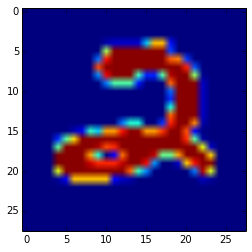

In [19]:
plt_img(test.iloc[0,:])

In [3]:
label = train['label']
del train['label']

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


In [13]:
cross_validation_svm(train.iloc[:5000,], label[:5000])

Accuracy: 0.0968
Accuracy: 0.1008
Accuracy: 0.1008
Accuracy: 0.1176


In [19]:
from sklearn.neighbors import KNeighborsClassifier
def cross_validation_knn(x, y, n_neighbors, k_fold = 4):
    kf = KFold(n_splits=k_fold, random_state=2)
    for train_idx, test_idx in kf.split(x):
        x_train, x_test = x.iloc[train_idx,:], x.iloc[test_idx,:]
        y_train, y_test = y[train_idx], y[test_idx]
        clf = KNeighborsClassifier(n_neighbors = n_neighbors)
        clf.fit(x_train, y_train)
        pred = clf.predict(x_test)
        print 'Accuracy: {}'.format(accuracy_score(y_test, pred))

In [20]:
cross_validation_knn(train.iloc[:5000,], label[:5000], 64)

Accuracy: 0.8344
Accuracy: 0.8784
Accuracy: 0.8464
Accuracy: 0.8656


In [21]:
cross_validation_knn(train.iloc[:5000,], label[:5000], 16)

Accuracy: 0.9104
Accuracy: 0.9096
Accuracy: 0.8984
Accuracy: 0.9128


In [22]:
cross_validation_knn(train.iloc[:5000,], label[:5000], 4)

Accuracy: 0.9216
Accuracy: 0.9264
Accuracy: 0.9136
Accuracy: 0.9256


In [23]:
cross_validation_knn(train.iloc[:5000,], label[:5000], 8)

Accuracy: 0.9152
Accuracy: 0.9232
Accuracy: 0.9176
Accuracy: 0.9272


In [24]:
clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(train, label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [ ]:
pred = clf.predict(test)

In [ ]:
pred = pd.DataFrame(pred, columns=['Label'])
pred.to_csv('output/knn8.csv', index_label='ImageId')

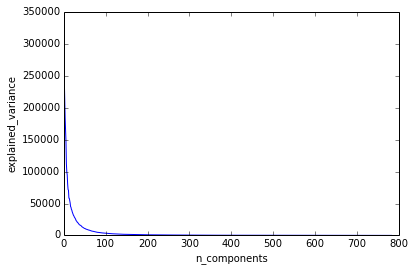

In [5]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(train)
plt.plot(pca.explained_variance_)
plt.xlabel('n_components')
plt.ylabel('explained_variance')
plt.show()


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
logit = LogisticRegression()
pca = PCA()
pip = Pipeline(steps=[('pca', pca), ('logit', logit)])
n_components = [75]
Cs = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
estimator = GridSearchCV(pip, dict(pca__n_components=n_components, 
                                   logit__C=Cs))
estimator.fit(train.iloc[:5000,], label[:5000])

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logit', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [75], 'logit__C': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [16]:
estimator.best_score_

0.88539999999999996

In [17]:
estimator.best_params_

{'logit__C': 0.5, 'pca__n_components': 75}

In [14]:
import pprint
pprint.pprint(estimator.cv_results_)

{'mean_fit_time': array([ 18.48432167,  25.76650469,  17.59106628,  26.314147  ,
        18.47348237,  29.68920573]),
 'mean_score_time': array([ 0.02876528,  0.01704971,  0.01641361,  0.02279878,  0.02077532,
        0.02392197]),
 'mean_test_score': array([ 0.8864,  0.8814,  0.8858,  0.884 ,  0.8854,  0.8818]),
 'mean_train_score': array([ 0.92279999,  0.93139872,  0.92689956,  0.93589894,  0.92810049,
        0.93789929]),
 'param_logit__C': masked_array(data = [0.5 0.5 1 1 1.5 1.5],
             mask = [False False False False False False],
       fill_value = ?)
,
 'param_pca__n_components': masked_array(data = [75 100 75 100 75 100],
             mask = [False False False False False False],
       fill_value = ?)
,
 'params': [{'logit__C': 0.5, 'pca__n_components': 75},
            {'logit__C': 0.5, 'pca__n_components': 100},
            {'logit__C': 1, 'pca__n_components': 75},
            {'logit__C': 1, 'pca__n_components': 100},
            {'logit__C': 1.5, 'pca__n_componen

In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
def cross_validation_svm(x, y, k_fold = 4):
    kf = KFold(n_splits=k_fold, random_state=2)
    for train_idx, test_idx in kf.split(x):
        x_train, x_test = x.iloc[train_idx,:], x.iloc[test_idx,:]
        y_train, y_test = y[train_idx], y[test_idx]
        clf = SVC()
        clf.fit(x_train, y_train)
        pred = clf.predict(x_test)
        print 'Accuracy: {}'.format(accuracy_score(y_test, pred))